<a href="https://colab.research.google.com/github/JorgeRicardo6050/Tareas-IA-/blob/main/ClasificadorDeNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías necesarias
import tensorflow as tf
from keras import layers, models  # Importamos layers y models desde keras
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Normalizamos los datos (escalamos los valores de píxeles entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

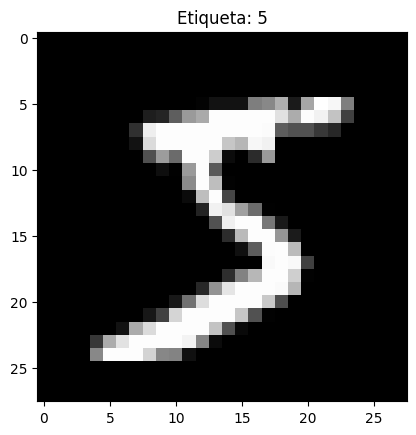

In [4]:
# Mostramos un ejemplo del dataset
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Etiqueta: {y_train[0]}")
plt.show()

In [5]:
# Definimos el modelo de red neuronal
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplanamos las imágenes de 28x28 píxeles
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    tf.keras.layers.Dropout(0.2),  # Dropout para evitar sobreajuste
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por cada dígito)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compilamos el modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Entrenamos el modelo
print("Comenzando entrenamiento...")
historial = modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
print("Entrenamiento finalizado!")

Comenzando entrenamiento...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8550 - loss: 0.4964 - val_accuracy: 0.9570 - val_loss: 0.1462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9554 - loss: 0.1482 - val_accuracy: 0.9703 - val_loss: 0.0967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9677 - loss: 0.1072 - val_accuracy: 0.9714 - val_loss: 0.0913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9722 - loss: 0.0890 - val_accuracy: 0.9742 - val_loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9780 - loss: 0.0696 - val_accuracy: 0.9778 - val_loss: 0.0764
Entrenamiento finalizado!


In [8]:
# Evaluamos el modelo con los datos de prueba
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=2)
print(f"Precisión en los datos de prueba: {test_acc:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.9778 - loss: 0.0764
Precisión en los datos de prueba: 0.98


In [9]:
# Realizamos una predicción
print("Realizando una predicción...")
predicciones = modelo.predict(x_test)
print(f"Predicción para la primera imagen de prueba: {predicciones[0].argmax()} (Etiqueta real: {y_test[0]})")

Realizando una predicción...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicción para la primera imagen de prueba: 7 (Etiqueta real: 7)


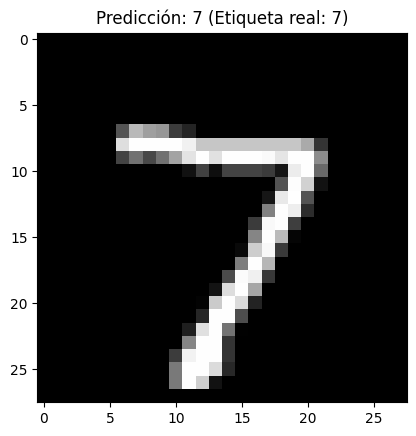

In [10]:
# Mostramos la primera imagen de prueba y su predicción
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicción: {predicciones[0].argmax()} (Etiqueta real: {y_test[0]})")
plt.show()